In [1]:
import subprocess
from pathlib import Path
import tempfile
import shlex
from IPython.display import SVG, Image

In [2]:
def run_mmdc(input_str, output_format="svg", output_width=600, debug=False):
    out_path = tempfile.mktemp(suffix=f".{output_format}")
    cmd = f"mmdc -q --backgroundColor transparent --width {output_width} -o {out_path} -s 2 -i -"
    p = subprocess.Popen(shlex.split(cmd), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, encoding="ascii", universal_newlines=False)
    stdout, stderr = p.communicate(input_str)

    if debug:
        print(stdout)
        print(stderr)

    out_file = Path(out_path)
    with out_file.open("rb") as fd:
        image_data = fd.read()
    out_file.unlink()
    if output_format == "svg":
        return SVG(data=image_data.decode("utf-8").replace("width=\"100%\"", "width=\"600\""))
    else:
        return Image(image_data, width=output_width)

# Naive execution

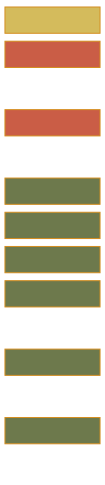

In [3]:
thread_version="""
block-beta
  columns 1
  T00["Main Thread"]:1

  T11["Task 1"]
  space
  T21["Task 2"]
  space
  P11["Periodical 1"]
  P12["Periodical 1"]
  P13["Periodical 1"]
  P14["Periodical 1"]
  
  space
  
  P21["Periodical 2"]
  space
  P23["Periodical 2"]
  space
  
  style T00 fill:#d4bb5c,stroke:#d48e20,color:#555;
  style T11 fill:#ca5d46,stroke:#d48e20,color:#cfcfcf; 
  style T21 fill:#ca5d46,stroke:#d48e20,color:#cfcfcf; 
  
  style P11 fill:#6d794c,stroke:#d48e20,color:#cfcfcf; 
  style P12 fill:#6d794c,stroke:#d48e20,color:#cfcfcf;
  style P13 fill:#6d794c,stroke:#d48e20,color:#cfcfcf; 
  style P14 fill:#6d794c,stroke:#d48e20,color:#cfcfcf;

  style P21 fill:#6d794c,stroke:#d48e20,color:#cfcfcf; 
  style P23 fill:#6d794c,stroke:#d48e20,color:#cfcfcf; 
  
"""
run_mmdc(thread_version, "svg", 800)